In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

Import data

In [187]:
df = pd.read_csv("default.csv",header=1) 

In [188]:
df = df.iloc[1:,1:]
df.columns = [x.lower() for x in df.columns]
df.rename(columns={'pay_0':'pay_1'}, inplace=True)
df=df.drop_duplicates(keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29964 entries, 1 to 29999
Data columns (total 24 columns):
limit_bal                     29964 non-null int64
sex                           29964 non-null int64
education                     29964 non-null int64
marriage                      29964 non-null int64
age                           29964 non-null int64
pay_1                         29964 non-null int64
pay_2                         29964 non-null int64
pay_3                         29964 non-null int64
pay_4                         29964 non-null int64
pay_5                         29964 non-null int64
pay_6                         29964 non-null int64
bill_amt1                     29964 non-null int64
bill_amt2                     29964 non-null int64
bill_amt3                     29964 non-null int64
bill_amt4                     29964 non-null int64
bill_amt5                     29964 non-null int64
bill_amt6                     29964 non-null int64
pay_amt1                

Data Cleaning

Here I deleted first row and coloum, and lowercased the name of coloum for convience.It seems there is no missing value but I still need to fo further check of the data.

In [189]:
df[['limit_bal','sex', 'education', 'marriage','age']].describe()

,limit_bal,sex,education,marriage,age
count,29964.000000,29964.000000,29964.000000,29964.000000,29964.000000
mean,167446.925644,1.603724,1.853624,1.551896,35.488353
std,129759.504797,0.489131,0.790424,0.521996,9.219374
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


I don't undersatnd the limit_bal coloum.

According to the observation, the geneder colunm looks good, but education has values equal to 0,5 and 6, and marriage has values equal to 0, which are not listed in the data description.I classified them as missing data and labeled them equal to others.

In [190]:
#df['education'] = df['education'].replace('0','4')
#df['marriage'] = df['marriage'].replace('0','3')
#df[['marriage']].describe()
#df.loc[df.marriage ==0, 'marriage'] = 3
#df.loc[(df['education'] ==0) | (df['education']==5)|(df['education']==6)]=4
#df.describe()

In [191]:
marriage=df[['marriage','default payment next month']]
ma_default=marriage.groupby(['marriage','default payment next month']).size().unstack()
ma_default['default_percentage']=ma_default[1]/np.sum(edu_default, axis=1)
ma_default

default payment next month,0,1,default_percentage
marriage,,,
0,49,5,0.357143
1,10442,3200,0.302309
2,12605,3340,0.238074
3,239,84,0.017083


In [192]:
edu=df[['education','default payment next month']]
edu_default=edu.groupby(['education','default payment next month']).size().unstack()
edu_default.fillna(0,inplace=True)
edu_default['default_percentage']=edu_default[1]/np.sum(edu_default, axis=1)
edu_default

default payment next month,0,1,default_percentage
education,,,
0,14.0,0.0,0.000000
1,8531.0,2032.0,0.192370
2,10691.0,3327.0,0.237338
3,3678.0,1237.0,0.251679
4,116.0,7.0,0.056911
5,262.0,18.0,0.064286
6,43.0,8.0,0.156863


The higher the education, the lower the default rate, which makes sense.
But here I need to classify labels which are not listed in the description.It's hard to decide how to deal with it

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 
_____________________________________________________________________________________________
X6 - X11: 
History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005;
. . .;
X11 = the repayment status in April, 2005. 
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
______________________________________________________________________________________________
X12-X17:
Amount of bill statement (NT dollar).
X12 = amount of bill statement in September, 2005; 
X13 = amount of bill statement in August, 2005;
. . .; 
X17 = amount of bill statement in April, 2005. 
______________________________________________________________________________________________
X18-X23: 
Amount of previous payment (NT dollar).
X18 = amount paid in September, 2005; 
X19 = amount paid in August, 2005; 
. . .;
X23 = amount paid in April, 2005. 

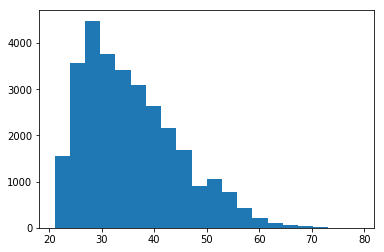

In [198]:
plt.hist('age', data=df,bins=20)
plt.show()

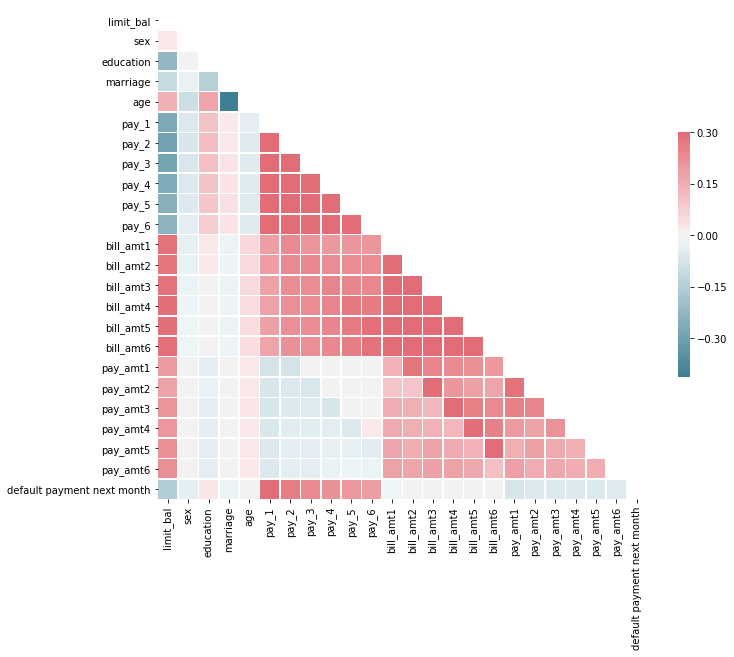

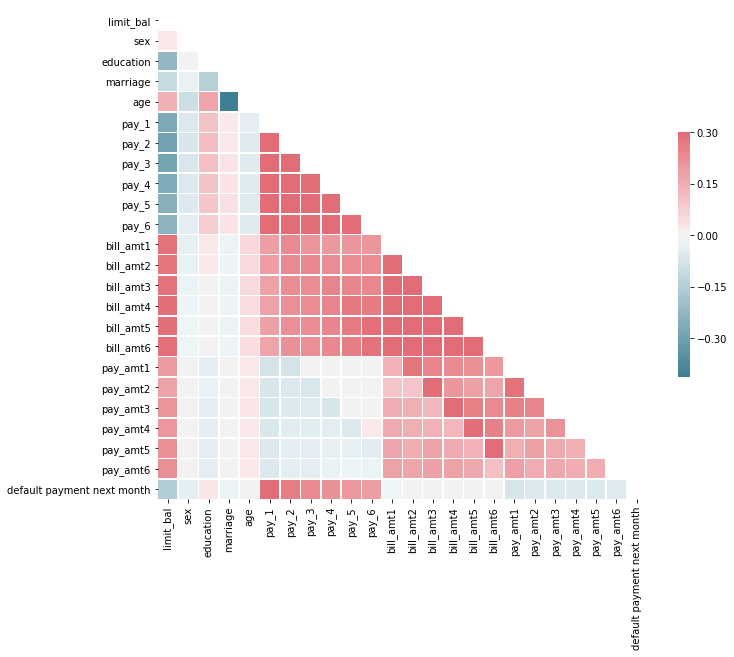

In [202]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

The correlation method here is questionable 